<h1><center>MIS 670 - Final Project</center></h1>

<h1><center>Post Election Social Media Sentiment Analysis</center></h1>

###  Donald Trump Tweets Part 2


In __Part 1__ of this notebook, we did some weight lifting. We were able to fetch twitter data from __JSON__ files. We manage to collect __235K+__ in relation to the official twitter account of President __Donald Trump__ (__@realDOnaldTrump__).

Tweets were also converted into CSV files and then to pandas dataframe. Descriptive statistics of the raw tweet data was done. __Text cleaning__ was initiated and semi-cleaned tweet data was exported into CSV files as __Cleaned_Trump_Part1__. We will pick up from where we left by importing the CSV files into df and will do further cleaning for __Text and Sentiment Analytics__.

First create a list named __cleaned__ from cleaned Joe Biden tweet

In [1]:
#Import libraries
import csv
import pandas as pd
import re

#Fetch data into list
cleaned = []
openfile = open('Cleaned_Trump_Part1.csv' , 'r')
r = csv.reader(openfile)
for i in r:
    cleaned.append(i)  
openfile.close()

# Display the first five

cleaned[:5]

[['', 'cleaned'],
 ['0', 'blogvermelho realdonaldtrump realdonaldtrump looooozeeerrrr'],
 ['1', 'realdonaldtrump accept you lost'],
 ['2',
  'joe biden fraud knows that well one day all things will come light and darkness will have more'],
 ['3', 'donaldjtrumpjr trumps darlin realdonaldtrump']]

Let's import the CSV file into pandas dataframe 

In [2]:
# into dataframe

df_cleaned= pd.read_csv('Cleaned_Trump_Part1.csv')

df_cleaned.head()

,Unnamed: 0,cleaned
0,0,blogvermelho realdonaldtrump realdonaldtrump l...
1,1,realdonaldtrump accept you lost
2,2,joe biden fraud knows that well one day all th...
3,3,donaldjtrumpjr trumps darlin realdonaldtrump
4,4,realdonaldtrump trump


Since we did some cleaning (removing __Short words__, removing __URLs, alphanumeric data,etc__), we will directly proceed with the remaining cleaning process __tokenize, lemmatize, removing common words__.

In [3]:
# Import further libraries

from pattern.en import sentiment
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#remove the extra bracket
cleaned = [x for y in cleaned for x in y]
# Remove useless numbers and alphanumerical words
 
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in cleaned]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

texts[:10] 

[[],
 ['cleaned'],
 [],
 ['blogvermelho', 'realdonaldtrump', 'realdonaldtrump', 'looooozeeerrrr'],
 [],
 ['realdonaldtrump', 'accept', 'lost'],
 [],
 ['joe',
  'biden',
  'fraud',
  'knows',
  'well',
  'one',
  'day',
  'things',
  'come',
  'light',
  'darkness'],
 [],
 ['donaldjtrumpjr', 'trumps', 'darlin', 'realdonaldtrump']]

### WORD CLOUD

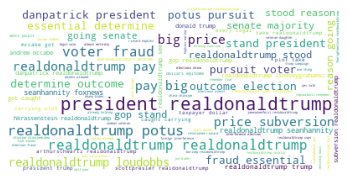

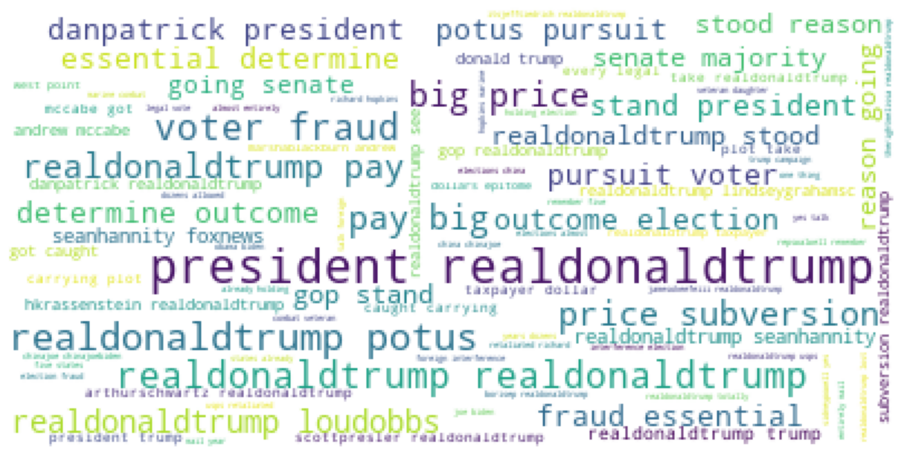

In [4]:
# Import further libraries

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(texts)
text = text.replace("'", '')
text = text.replace(',', '')


# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("trump.png")
plt.savefig("trump.pdf")

As can be seen from above, the twitter username of President Trump is creating too much noise. We would like to remove it and some other related names to see the actual contents. 

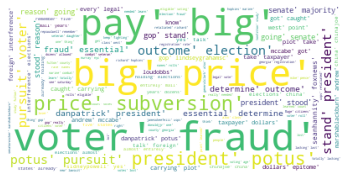

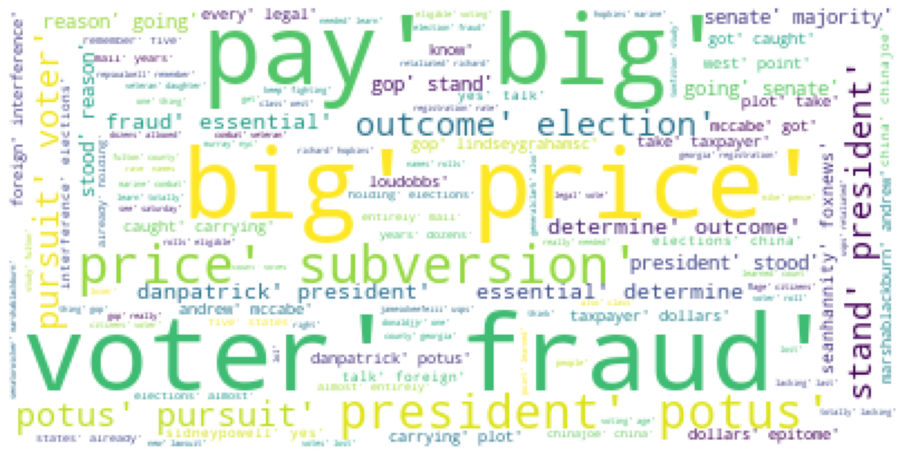

In [5]:
# remove names of the candidates

text = str(texts)
text = text.replace('joebiden', '')
text = text.replace('biden', '')
text = text.replace('realdonaldtrump', '')
text = text.replace('mikepence', '')
text = text.replace('donaldtrump', '')
text = text.replace('trump', '')


# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("trump2.png")
plt.savefig("trump2.pdf")

## Sentiment Analysis

Let's use __pattern__ for sentiment analysis.

In [6]:
# The whole text
sentiment(text)

(0.06069714734379756, 0.48158025379708386)

In [7]:
# The first 15 rows
for row in text[:15]:
    print(sentiment(row))

(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)


In [8]:
# Scores

for row in text[:10]:
    score = sentiment(row)
    print(round(score[0],3), round(score[1],3))

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


#### Sentiment polarity using TextBlob

In [9]:
from textblob import TextBlob
testimonial = TextBlob(text)
testimonial.sentiment

Sentiment(polarity=0.06069714734379756, subjectivity=0.48158025379708386)

### Positive, Negative and Neutral tweets

Let's use __pattern__ sentiment analysis for this

In [10]:
# Define negative positive words
positive_words = open("data/positive-words.txt", "r").read().splitlines() 
negative_words = open("data/negative-words.txt", "r").read().splitlines()

In [15]:
positive_tweet = []
negative_tweet = []
neutral_tweet = []
 
for row in text:
    tweet = str(row)
    score = sentiment(tweet)
    if score[0] > 0:
        positive_tweet.append(tweet)
    elif score[0] == 0:
        neutral_tweet.append(tweet)
    else:
        negative_tweet.append(tweet)

In [17]:
print(len(positive_tweet))
print(len(negative_tweet))
print(len(neutral_tweet))

0
0
19003325


As seen from above, almost all of the tweets are __neutral__ and there is no need to create word cloud for negative and positive tweets.